In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from scipy import stats

In [2]:
wa_data = pd.read_csv('../Inputs/SALESInputs/WA_MJ_Sales_and_Taxes.csv')
wa_data = wa_data[:-1]
wa_data = wa_data.rename(columns={
    'Month of Activity2': 'Month',
    'Taxable retail sales as reported by marijuana collectives (before tax)3': 'Taxable Retail Sales',
    'Estimated retail value of marijuana and marijuana products sold at a licensed marijuana retailer (before tax)4': 'Estimated Retail Value',
    'Total retail value of marijuana and marijuana products (before tax)': 'Total Retail Value',
    'Sales exempt from sales tax for medical purposes5': 'Tax-exempt Sales',
    'Estimated retail value of marijuana and marijuana products subject to state and local sales taxes': 'Est. Retail Value subject to Tax',
    'Estimated state sales tax collections': 'Est. State Sales Tax Collections',
    'Weighted average local sales tax rate6': 'Avg. Local Sales Tax Rate',
    'Estimated local sales tax collections': 'Est. Local Sales Tax Collections'
})
wa_data['State'] = 'WA'
wa_data['Month2'] = np.arange(7,58)
wa_data

,Month,Year,Taxable Retail Sales,Estimated Retail Value,Total Retail Value,Tax-exempt Sales,Est. Retail Value subject to Tax,Est. State Sales Tax Collections,Avg. Local Sales Tax Rate,Est. Local Sales Tax Collections,State,Month2
0,July,2014,7478000,1847000,9325000,0,9325000,606000,0.024696,230000,WA,7
1,August,2014,7347000,4555000,11902000,0,11902000,774000,0.024696,294000,WA,8
2,September,2014,8598000,5806000,14404000,0,14404000,936000,0.024696,356000,WA,9
3,October,2014,7597000,7746000,15344000,0,15344000,997000,0.024696,379000,WA,10
4,November,2014,7526000,9091000,16618000,0,16618000,1080000,0.024696,410000,WA,11
5,December,2014,12405000,11605000,24010000,0,24010000,1561000,0.024696,593000,WA,12
6,January,2015,10237000,13096000,23334000,0,23334000,1517000,0.024696,576000,WA,13
7,February,2015,9869000,16086000,25955000,0,25955000,1687000,0.024696,641000,WA,14
8,March,2015,11367000,21363000,32730000,0,32730000,2127000,0.024696,808000,WA,15
9,April,2015,11451000,24854000,36306000,0,36306000,2360000,0.024696,897000,WA,16


In [3]:
wa_data = wa_data[['Month', 'Year', 'Month2', 'Total Retail Value', 'State']]
wa_data = wa_data.rename(columns={
    'Total Retail Value':'Total Sales'
})
wa_data

,Month,Year,Month2,Total Sales,State
0,July,2014,7,9325000,WA
1,August,2014,8,11902000,WA
2,September,2014,9,14404000,WA
3,October,2014,10,15344000,WA
4,November,2014,11,16618000,WA
5,December,2014,12,24010000,WA
6,January,2015,13,23334000,WA
7,February,2015,14,25955000,WA
8,March,2015,15,32730000,WA
9,April,2015,16,36306000,WA


In [4]:
wa_data['Year']= wa_data['Year'].astype('str', )
#wa_data['Date'] = wa_data['Month'].str.cat(others=wa_data['Year'])
wa_data

,Month,Year,Month2,Total Sales,State
0,July,2014,7,9325000,WA
1,August,2014,8,11902000,WA
2,September,2014,9,14404000,WA
3,October,2014,10,15344000,WA
4,November,2014,11,16618000,WA
5,December,2014,12,24010000,WA
6,January,2015,13,23334000,WA
7,February,2015,14,25955000,WA
8,March,2015,15,32730000,WA
9,April,2015,16,36306000,WA


In [5]:
wa_data['Date'] = wa_data['Month'].str.cat(others=wa_data['Year'])
wa_data['Date'] = pd.to_datetime(pd.Series(wa_data['Date']),
                                format="%B%Y")
wa_data

,Month,Year,Month2,Total Sales,State,Date
0,July,2014,7,9325000,WA,2014-07-01
1,August,2014,8,11902000,WA,2014-08-01
2,September,2014,9,14404000,WA,2014-09-01
3,October,2014,10,15344000,WA,2014-10-01
4,November,2014,11,16618000,WA,2014-11-01
5,December,2014,12,24010000,WA,2014-12-01
6,January,2015,13,23334000,WA,2015-01-01
7,February,2015,14,25955000,WA,2015-02-01
8,March,2015,15,32730000,WA,2015-03-01
9,April,2015,16,36306000,WA,2015-04-01


In [6]:
co_data = pd.read_csv('../Inputs/SALESInputs/CO_MJ_Sales.csv')
co_data['State'] = 'CO'
co_data = co_data.drop(columns=[
    'Medical Monthly Sales',
    'Medical YTD'
])
co_data = co_data[:-1]
co_data['Month2'] = np.arange(1,60)
co_data = co_data[['Month', 'Year', 'Month2', 'Total Monthly Sales', 'State']]
co_data = co_data.rename(columns={
    'Total Monthly Sales':'Total Sales'
})
co_data['Total Sales']= co_data['Total Sales'].astype(int)
co_data

,Month,Year,Month2,Total Sales,State
0,January,2014.0,1,46563933,CO
1,February,2014.0,2,45987045,CO
2,March,2014.0,3,54703509,CO
3,April,2014.0,4,53452855,CO
4,May,2014.0,5,52730209,CO
5,June,2014.0,6,53928391,CO
6,July,2014.0,7,61004415,CO
7,August,2014.0,8,67432834,CO
8,September,2014.0,9,63066595,CO
9,October,2014.0,10,62965201,CO


In [7]:
co_data['Year']= co_data['Year'].astype(str)
co_data['Year'] = co_data['Year'].str.replace('.0', '')
co_data

,Month,Year,Month2,Total Sales,State
0,January,14,1,46563933,CO
1,February,14,2,45987045,CO
2,March,14,3,54703509,CO
3,April,14,4,53452855,CO
4,May,14,5,52730209,CO
5,June,14,6,53928391,CO
6,July,14,7,61004415,CO
7,August,14,8,67432834,CO
8,September,14,9,63066595,CO
9,October,14,10,62965201,CO


In [8]:
co_data['Date'] = co_data['Month'].str.cat(others=co_data['Year'])
co_data['Date'] = co_data['Date'].str.replace(' ', '')
co_data['Date'] = pd.to_datetime(pd.Series(co_data['Date']), format="%B%y")
co_data

,Month,Year,Month2,Total Sales,State,Date
0,January,14,1,46563933,CO,2014-01-01
1,February,14,2,45987045,CO,2014-02-01
2,March,14,3,54703509,CO,2014-03-01
3,April,14,4,53452855,CO,2014-04-01
4,May,14,5,52730209,CO,2014-05-01
5,June,14,6,53928391,CO,2014-06-01
6,July,14,7,61004415,CO,2014-07-01
7,August,14,8,67432834,CO,2014-08-01
8,September,14,9,63066595,CO,2014-09-01
9,October,14,10,62965201,CO,2014-10-01


In [9]:
ak_data = pd.read_csv('../Inputs/SALESInputs/AK_MJ_Sales.csv')
ak_data = ak_data[:-1]
ak_data = ak_data[2:]
ak_data['Month2'] = np.arange(36, 58)
ak_data['State'] = 'AK'
ak_data = ak_data[['Month', 'Year', 'Month2', 'Total Sales', 'State']]
ak_data

,Month,Year,Month2,Total Sales,State
2,December,2016.0,36,830384.0,AK
3,January,2017.0,37,589072.0,AK
4,February,2017.0,38,709520.0,AK
5,March,2017.0,39,1204400.0,AK
6,April,2017.0,40,1467088.0,AK
7,May,2017.0,41,1514080.0,AK
8,June,2017.0,42,2849744.0,AK
9,July,2017.0,43,3203424.0,AK
10,August,2017.0,44,3845568.0,AK
11,September,2017.0,45,3906432.0,AK


In [10]:
ak_data['Year']= ak_data['Year'].astype(str)
ak_data['Year'] = ak_data['Year'].str.replace('.0', '')
ak_data

,Month,Year,Month2,Total Sales,State
2,December,16,36,830384.0,AK
3,January,17,37,589072.0,AK
4,February,17,38,709520.0,AK
5,March,17,39,1204400.0,AK
6,April,17,40,1467088.0,AK
7,May,17,41,1514080.0,AK
8,June,17,42,2849744.0,AK
9,July,17,43,3203424.0,AK
10,August,17,44,3845568.0,AK
11,September,17,45,3906432.0,AK


In [11]:
ak_data['Date'] = ak_data['Month'].str.cat(others=ak_data['Year'])
ak_data['Date'] = ak_data['Date'].str.replace(' ', '')
ak_data['Date'] = pd.to_datetime(pd.Series(ak_data['Date']), format="%B%y")
ak_data

,Month,Year,Month2,Total Sales,State,Date
2,December,16,36,830384.0,AK,2016-12-01
3,January,17,37,589072.0,AK,2017-01-01
4,February,17,38,709520.0,AK,2017-02-01
5,March,17,39,1204400.0,AK,2017-03-01
6,April,17,40,1467088.0,AK,2017-04-01
7,May,17,41,1514080.0,AK,2017-05-01
8,June,17,42,2849744.0,AK,2017-06-01
9,July,17,43,3203424.0,AK,2017-07-01
10,August,17,44,3845568.0,AK,2017-08-01
11,September,17,45,3906432.0,AK,2017-09-01


In [12]:
ore_data = pd.read_csv('../Inputs/SALESInputs/OR_MJ_Sales.csv')
ore_data = ore_data.drop(columns=['Unnamed: 4'])
ore_data['Month2'] = np.arange(26, 60)
ore_data['State'] = 'OR'
ore_data = ore_data[['Month', 'Year', 'Month2', 'Total Sales', 'State']]
ore_data 

,Month,Year,Month2,Total Sales,State
0,February,2016,26,14612764.71,OR
1,March,2016,27,25639729.41,OR
2,April,2016,28,21971241.18,OR
3,May,2016,29,25526117.65,OR
4,June,2016,30,33738282.35,OR
5,July,2016,31,32552641.18,OR
6,August,2016,32,43207535.29,OR
7,September,2016,33,39291676.47,OR
8,October,2016,34,46065629.41,OR
9,November,2016,35,38022805.88,OR


In [13]:
ore_data['Year']= ore_data['Year'].astype(str)
ore_data['Year'] = ore_data['Year'].str.replace('.0', '')
ore_data['Date'] = ore_data['Month'].str.cat(others=ore_data['Year'])
ore_data['Date'] = ore_data['Date'].str.replace(' ', '')
ore_data['Date'] = pd.to_datetime(pd.Series(ore_data['Date']), format="%B%y")
ore_data

,Month,Year,Month2,Total Sales,State,Date
0,February,16,26,14612764.71,OR,2016-02-01
1,March,16,27,25639729.41,OR,2016-03-01
2,April,16,28,21971241.18,OR,2016-04-01
3,May,16,29,25526117.65,OR,2016-05-01
4,June,16,30,33738282.35,OR,2016-06-01
5,July,16,31,32552641.18,OR,2016-07-01
6,August,16,32,43207535.29,OR,2016-08-01
7,September,16,33,39291676.47,OR,2016-09-01
8,October,16,34,46065629.41,OR,2016-10-01
9,November,16,35,38022805.88,OR,2016-11-01


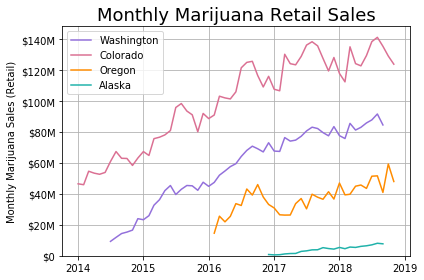

In [14]:
fig1,ax1=plt.subplots()

ax1.plot(wa_data['Date'], wa_data['Total Sales'], color="mediumpurple", label="Washington")
ax1.plot(co_data['Date'], co_data['Total Sales'], color="palevioletred", label="Colorado")
ax1.plot(ore_data['Date'], ore_data['Total Sales'], color="darkorange", label="Oregon")
ax1.plot(ak_data['Date'], ak_data['Total Sales'], color="lightseagreen", label="Alaska")
ax1.xaxis_date()

plt.title('Monthly Marijuana Retail Sales', fontsize=18)
plt.legend(loc="best")

plt.ylim(0, max(co_data['Total Sales']*1.05))
plt.ylabel('Monthly Marijuana Sales (Retail)')
y_labels = ['$0', '$20M', '$40M', '$60M', '$80M', '$100M', '$120M', '$140M']
ax1.set_yticklabels(y_labels)

plt.tight_layout()
plt.grid()

plt.show()

In [15]:
co_vice_data = pd.read_csv('../Inputs/SALESInputs/CO_Alcohol_Sales.csv')
co_vice_data = co_vice_data[:-5]
co_vice_data = co_vice_data[['Year', 'Total Marijuana Sales', 'Alcohol Tax Collections', 'Gallons of Alcohol Consumed', 'Packs of Cigarettes taxed', 'Cigarette Tax Collections', 'Tobacco Products Collections', 'Avg. Tax Per Pack']]
co_vice_data

,Year,Total Marijuana Sales,Alcohol Tax Collections,Gallons of Alcohol Consumed,Packs of Cigarettes taxed,Cigarette Tax Collections,Tobacco Products Collections,Avg. Tax Per Pack
0,2006.0,NaN,33216803.0,NaN,247700000.0,206131914.0,23075379.0,0.832184
1,2007.0,NaN,34394199.0,NaN,242900000.0,202089387.0,25573502.0,0.831986
2,2008.0,NaN,35471594.0,NaN,235400000.0,195867073.0,24831455.0,0.832061
3,2009.0,NaN,35971804.0,NaN,227400000.0,189191000.0,27974310.0,0.831974
4,2010.0,NaN,36208537.0,135824179.0,210200000.0,174863159.0,28200649.0,0.831889
5,2011.0,NaN,37014005.0,136778438.0,204400000.0,169875969.0,29165873.0,0.831096
6,2012.0,NaN,38817101.0,136489856.0,207700000.0,172806694.0,30591878.0,0.832001
7,2013.0,NaN,39863646.0,143468372.0,198900000.0,165468129.0,31558236.0,0.831916
8,2014.0,3.032397e+08,40886494.0,141184231.0,193000000.0,160674017.0,33474323.0,0.832508
9,2015.0,5.775363e+08,42074458.0,130031148.0,194000000.0,161564387.0,35452212.0,0.832806


In [16]:
co_vice_data['Year']= co_vice_data['Year'].astype(str)

co_vice_data

,Year,Total Marijuana Sales,Alcohol Tax Collections,Gallons of Alcohol Consumed,Packs of Cigarettes taxed,Cigarette Tax Collections,Tobacco Products Collections,Avg. Tax Per Pack
0,2006.0,NaN,33216803.0,NaN,247700000.0,206131914.0,23075379.0,0.832184
1,2007.0,NaN,34394199.0,NaN,242900000.0,202089387.0,25573502.0,0.831986
2,2008.0,NaN,35471594.0,NaN,235400000.0,195867073.0,24831455.0,0.832061
3,2009.0,NaN,35971804.0,NaN,227400000.0,189191000.0,27974310.0,0.831974
4,2010.0,NaN,36208537.0,135824179.0,210200000.0,174863159.0,28200649.0,0.831889
5,2011.0,NaN,37014005.0,136778438.0,204400000.0,169875969.0,29165873.0,0.831096
6,2012.0,NaN,38817101.0,136489856.0,207700000.0,172806694.0,30591878.0,0.832001
7,2013.0,NaN,39863646.0,143468372.0,198900000.0,165468129.0,31558236.0,0.831916
8,2014.0,3.032397e+08,40886494.0,141184231.0,193000000.0,160674017.0,33474323.0,0.832508
9,2015.0,5.775363e+08,42074458.0,130031148.0,194000000.0,161564387.0,35452212.0,0.832806


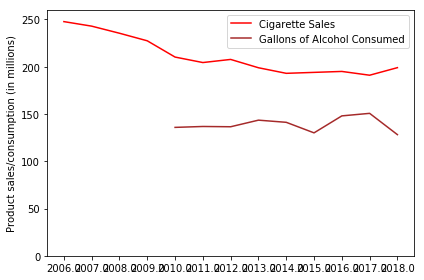

In [78]:
fig1,ax1=plt.subplots(sharex=True, sharey=True)

y1_labels = ['0', '50', '100', '150', '200', '250']

ax1.plot(co_vice_data['Year'], co_vice_data['Packs of Cigarettes taxed'], color="red", label="Cigarette Sales")
ax1.plot(co_vice_data['Year'], co_vice_data['Gallons of Alcohol Consumed'], color='brown')
ax1.set_ylabel('Product sales/consumption (in millions)')
ax1.set_yticklabels(y1_labels)
plt.ylim(0, max(co_vice_data['Packs of Cigarettes taxed']*1.05))

plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [128]:
pop_data = pd.read_csv('../Inputs/POPSTATSInputs/population_estimates_project1.csv')
pop_data

,Geography,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,United States,"309,326,085","311,580,009","313,874,218","316,057,727","318,386,421","320,742,673","323,071,342","325,147,121","327,167,434"
1,.Alabama,"4,785,448","4,798,834","4,815,564","4,830,460","4,842,481","4,853,160","4,864,745","4,875,120","4,887,871"
2,.Alaska,"713,906","722,038","730,399","737,045","736,307","737,547","741,504","739,786","737,438"
3,.Arizona,"6,407,774","6,473,497","6,556,629","6,634,999","6,733,840","6,833,596","6,945,452","7,048,876","7,171,646"
4,.Arkansas,"2,921,978","2,940,407","2,952,109","2,959,549","2,967,726","2,978,407","2,990,410","3,002,997","3,013,825"
5,.California,"37,320,903","37,641,823","37,960,782","38,280,824","38,625,139","38,953,142","39,209,127","39,399,349","39,557,045"
6,.Colorado,"5,048,281","5,121,771","5,193,721","5,270,482","5,351,218","5,452,107","5,540,921","5,615,902","5,695,564"
7,.Connecticut,"3,579,125","3,588,023","3,594,395","3,594,915","3,594,783","3,587,509","3,578,674","3,573,880","3,572,665"
8,.Delaware,"899,595","907,316","915,188","923,638","932,596","941,413","949,216","957,078","967,171"
9,.District of Columbia,"605,085","619,602","634,725","650,431","662,513","675,254","686,575","695,691","702,455"


In [129]:
pop_data = pop_data.loc[[2, 6, 38, 48]]
pop_data

,Geography,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,.Alaska,"713,906","722,038","730,399","737,045","736,307","737,547","741,504","739,786","737,438"
6,.Colorado,"5,048,281","5,121,771","5,193,721","5,270,482","5,351,218","5,452,107","5,540,921","5,615,902","5,695,564"
38,.Oregon,"3,837,532","3,871,728","3,899,118","3,922,908","3,964,106","4,016,918","4,091,404","4,146,592","4,190,713"
48,.Washington,"6,742,902","6,821,655","6,892,876","6,962,906","7,052,439","7,163,543","7,294,680","7,425,432","7,535,591"


In [130]:
pop_data = pop_data.rename(columns={
    'Geography':'State'
})
pop_data = pop_data.transpose()
pop_data

,2,6,38,48
State,.Alaska,.Colorado,.Oregon,.Washington
2010,"713,906","5,048,281","3,837,532","6,742,902"
2011,"722,038","5,121,771","3,871,728","6,821,655"
2012,"730,399","5,193,721","3,899,118","6,892,876"
2013,"737,045","5,270,482","3,922,908","6,962,906"
2014,"736,307","5,351,218","3,964,106","7,052,439"
2015,"737,547","5,452,107","4,016,918","7,163,543"
2016,"741,504","5,540,921","4,091,404","7,294,680"
2017,"739,786","5,615,902","4,146,592","7,425,432"
2018,"737,438","5,695,564","4,190,713","7,535,591"


In [131]:
pop_data.columns = pop_data.iloc[0]
pop_data

State,.Alaska,.Colorado,.Oregon,.Washington
State,.Alaska,.Colorado,.Oregon,.Washington
2010,"713,906","5,048,281","3,837,532","6,742,902"
2011,"722,038","5,121,771","3,871,728","6,821,655"
2012,"730,399","5,193,721","3,899,118","6,892,876"
2013,"737,045","5,270,482","3,922,908","6,962,906"
2014,"736,307","5,351,218","3,964,106","7,052,439"
2015,"737,547","5,452,107","4,016,918","7,163,543"
2016,"741,504","5,540,921","4,091,404","7,294,680"
2017,"739,786","5,615,902","4,146,592","7,425,432"
2018,"737,438","5,695,564","4,190,713","7,535,591"


In [132]:
pop_data = pop_data.reset_index()
pop_data

State,index,.Alaska,.Colorado,.Oregon,.Washington
0,State,.Alaska,.Colorado,.Oregon,.Washington
1,2010,"713,906","5,048,281","3,837,532","6,742,902"
2,2011,"722,038","5,121,771","3,871,728","6,821,655"
3,2012,"730,399","5,193,721","3,899,118","6,892,876"
4,2013,"737,045","5,270,482","3,922,908","6,962,906"
5,2014,"736,307","5,351,218","3,964,106","7,052,439"
6,2015,"737,547","5,452,107","4,016,918","7,163,543"
7,2016,"741,504","5,540,921","4,091,404","7,294,680"
8,2017,"739,786","5,615,902","4,146,592","7,425,432"
9,2018,"737,438","5,695,564","4,190,713","7,535,591"


In [133]:
pop_data['.Alaska'] = pop_data['.Alaska'].str.replace(',', '')
pop_data['.Colorado'] = pop_data['.Colorado'].str.replace(',', '')
pop_data['.Oregon'] = pop_data['.Oregon'].str.replace(',', '')
pop_data['.Washington'] = pop_data['.Washington'].str.replace(',', '')
pop_data

State,index,.Alaska,.Colorado,.Oregon,.Washington
0,State,.Alaska,.Colorado,.Oregon,.Washington
1,2010,713906,5048281,3837532,6742902
2,2011,722038,5121771,3871728,6821655
3,2012,730399,5193721,3899118,6892876
4,2013,737045,5270482,3922908,6962906
5,2014,736307,5351218,3964106,7052439
6,2015,737547,5452107,4016918,7163543
7,2016,741504,5540921,4091404,7294680
8,2017,739786,5615902,4146592,7425432
9,2018,737438,5695564,4190713,7535591


In [134]:
pop_data = pop_data[1:]
pop_data = pop_data.rename(columns={
    '.Alaska':'Alaska',
    '.Colorado':'Colorado',
    '.Oregon':'Oregon',
    '.Washington':'Washington',
    'index':'Year'
})
pop_data

State,Year,Alaska,Colorado,Oregon,Washington
1,2010,713906,5048281,3837532,6742902
2,2011,722038,5121771,3871728,6821655
3,2012,730399,5193721,3899118,6892876
4,2013,737045,5270482,3922908,6962906
5,2014,736307,5351218,3964106,7052439
6,2015,737547,5452107,4016918,7163543
7,2016,741504,5540921,4091404,7294680
8,2017,739786,5615902,4146592,7425432
9,2018,737438,5695564,4190713,7535591


In [135]:
pop_data.dtypes


State
Year          object
Alaska        object
Colorado      object
Oregon        object
Washington    object
dtype: object

In [136]:
pop_data['Colorado']= pop_data['Colorado'].astype('float')
pop_data['Washington']= pop_data['Washington'].astype('float')
pop_data['Oregon']= pop_data['Oregon'].astype('float')
pop_data['Alaska']= pop_data['Alaska'].astype('float')
pop_data.dtypes

State
Year           object
Alaska        float64
Colorado      float64
Oregon        float64
Washington    float64
dtype: object

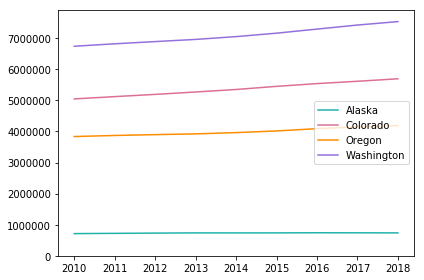

In [141]:
fig1,ax1=plt.subplots(sharex=True, sharey=True)

#y1_labels = ['0', '50', '100', '150', '200', '250']

ax1.plot(pop_data['Year'], pop_data['Alaska'], color="lightseagreen", label='Alaska')
ax1.plot(pop_data['Year'], pop_data['Colorado'], color='palevioletred', label='Colorado')
ax1.plot(pop_data['Year'], pop_data['Oregon'], color='darkorange', label='Oregon')
ax1.plot(pop_data['Year'], pop_data['Washington'], color='mediumpurple', label='Washington')

ax2 = ax1.twinx()
ax2.plot()



#ax1.set_ylabel('Product sales/consumption (in millions)')
#ax1.set_yticklabels(y1_labels)
plt.ylim(0, max(pop_data['Washington']*1.05))

plt.legend(loc="center right")
plt.tight_layout()
plt.show()